In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-airports/World_Airports.csv


In [32]:
import pandas as pd

file_path = '/kaggle/input/world-airports/World_Airports.csv'
df = pd.read_csv(file_path)

# Step 2: Get the column names
column_names = df.columns.tolist()

# Step 3: Print the column names
print("Column Names:")
print(column_names)


Column Names:
['X', 'Y', 'OBJECTID', 'id', 'airport_ident', 'type', 'name', 'latitude_deg', 'longitude_deg', 'elevation_ft', 'continent', 'iso_country', 'iso_region', 'municipality', 'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords', 'description', 'frequency_mhz', 'runway_length_ft', 'runway_width_ft', 'runway_surface', 'runway_lighted', 'runway_closed']


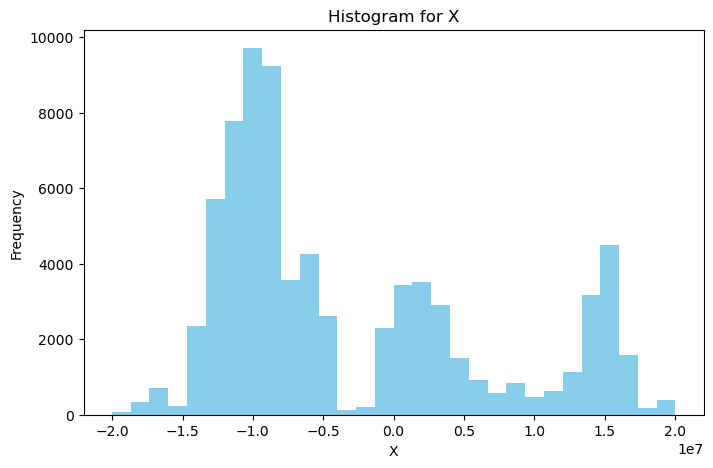

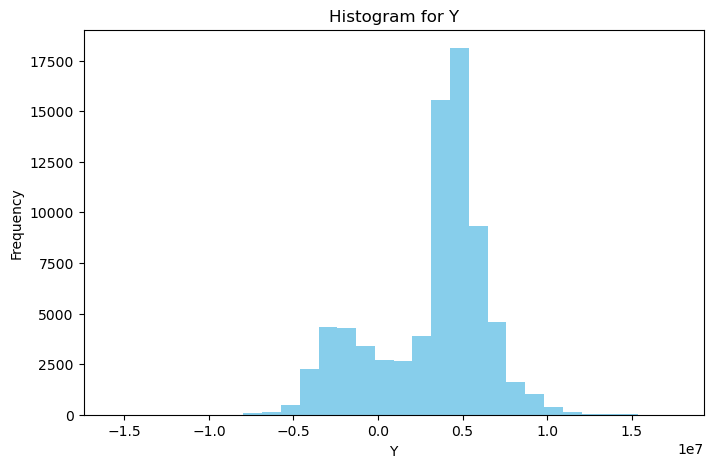

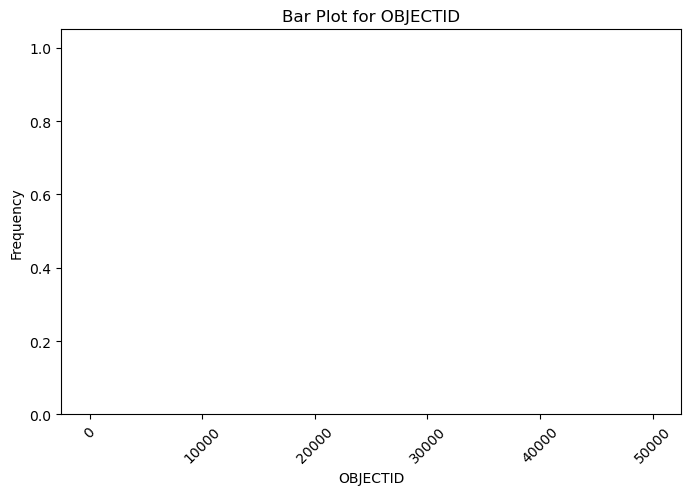

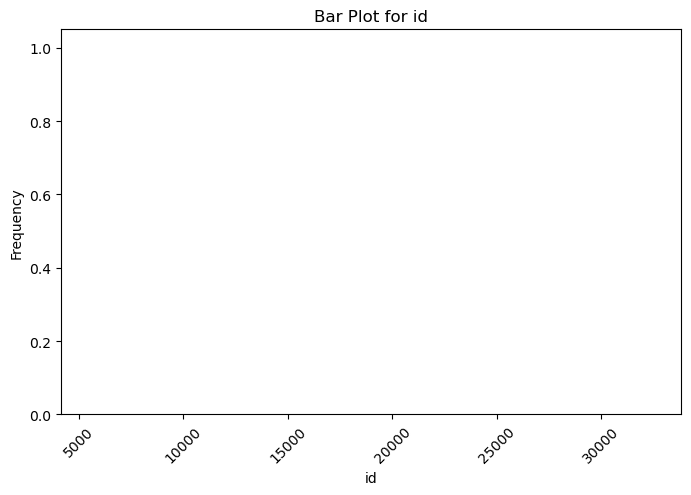

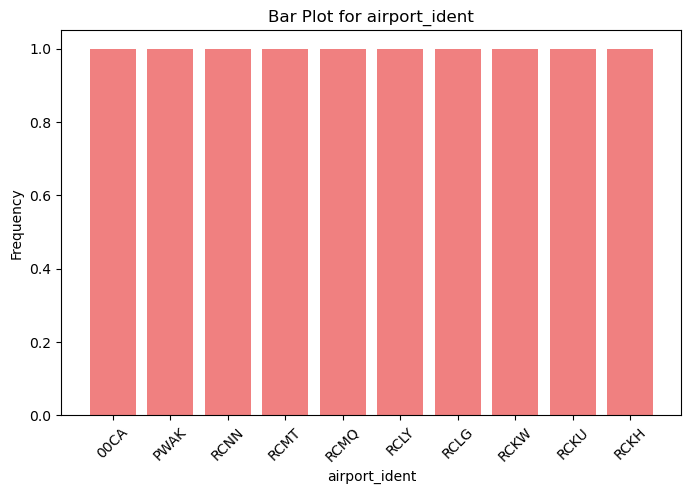

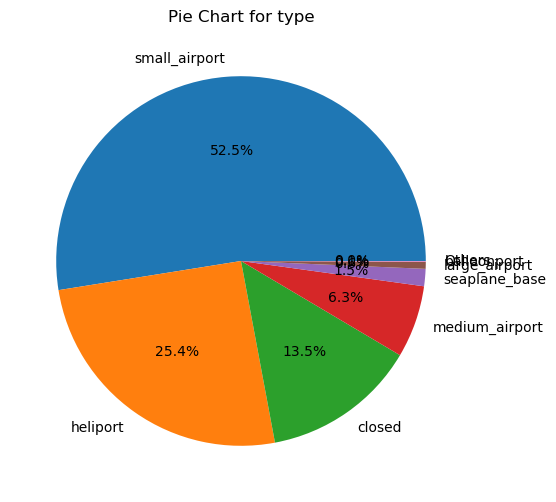

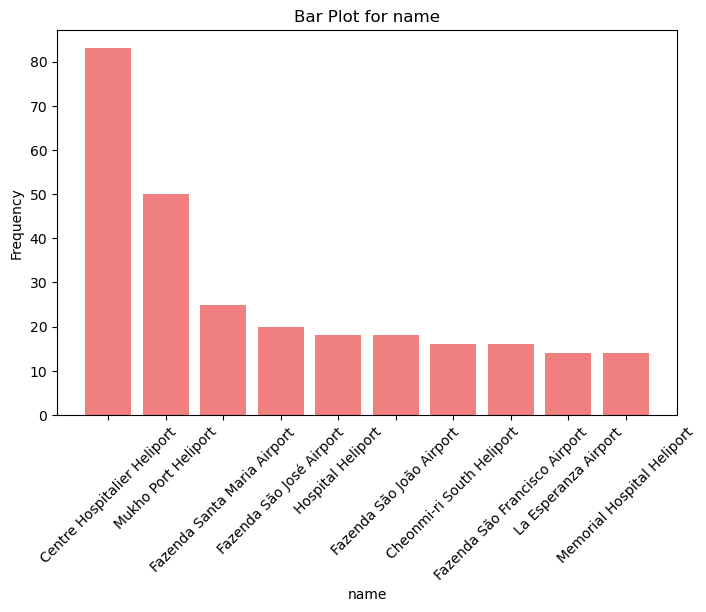

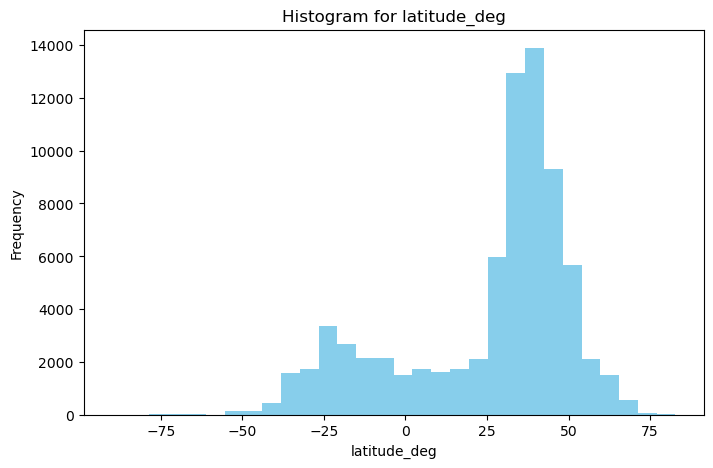

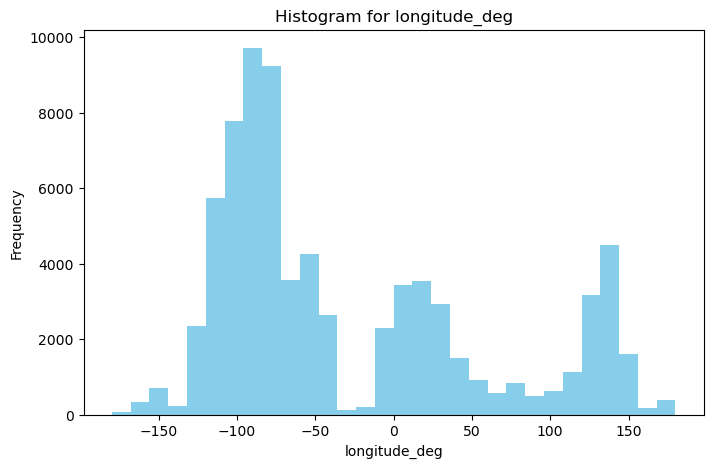

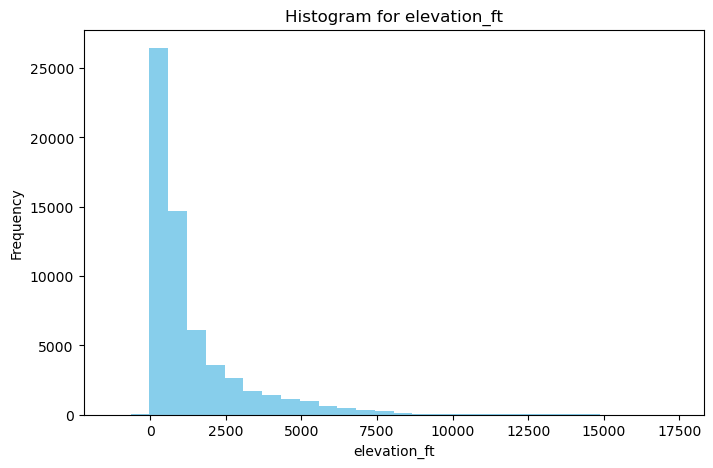

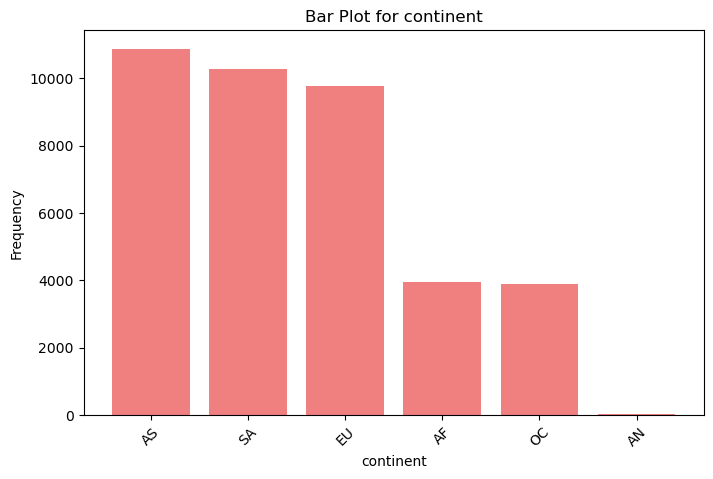

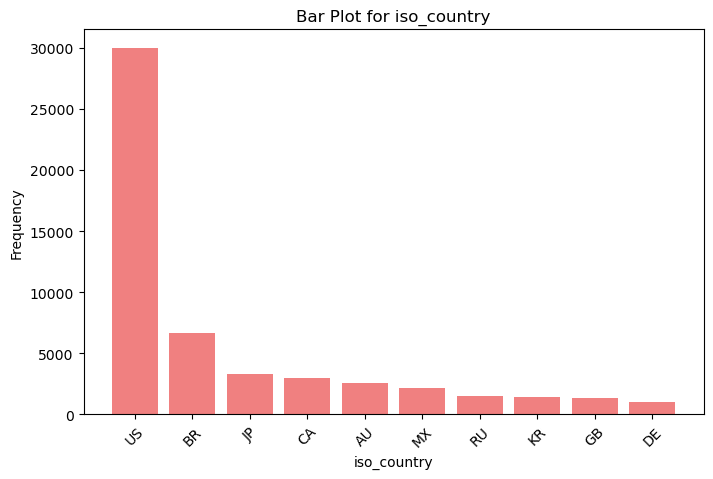

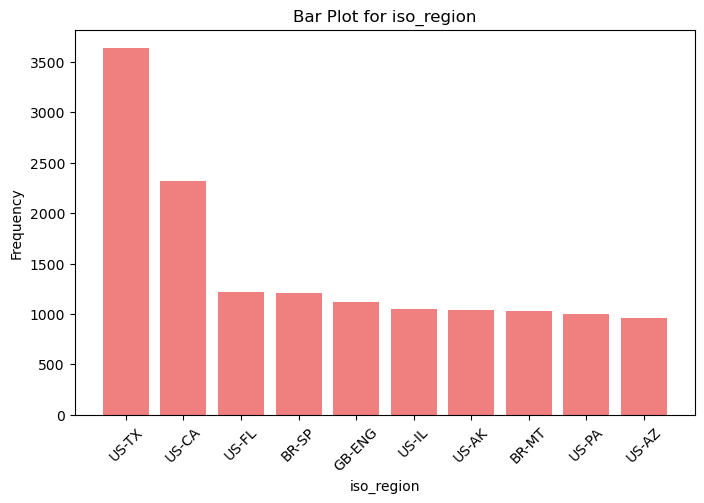

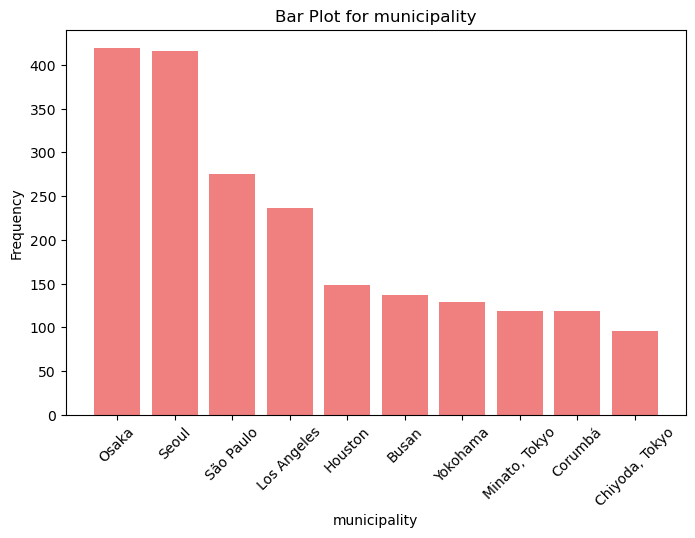

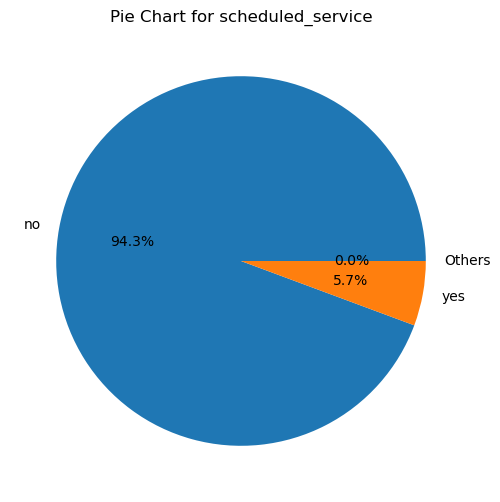

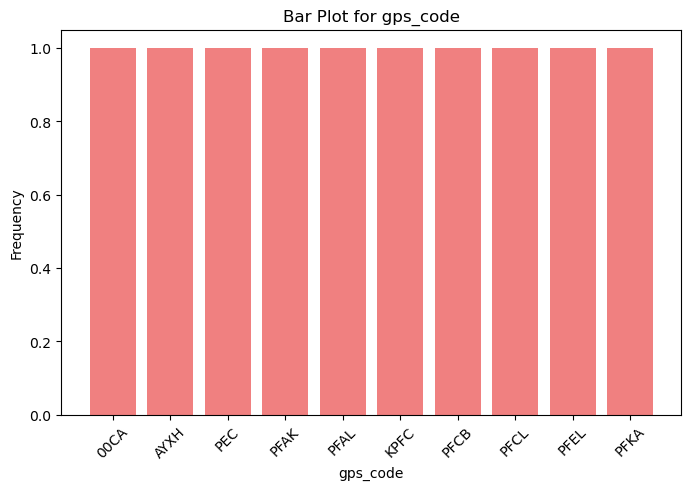

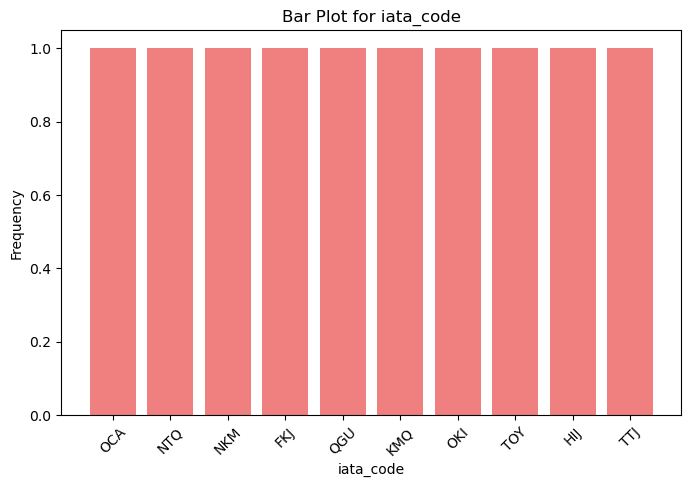

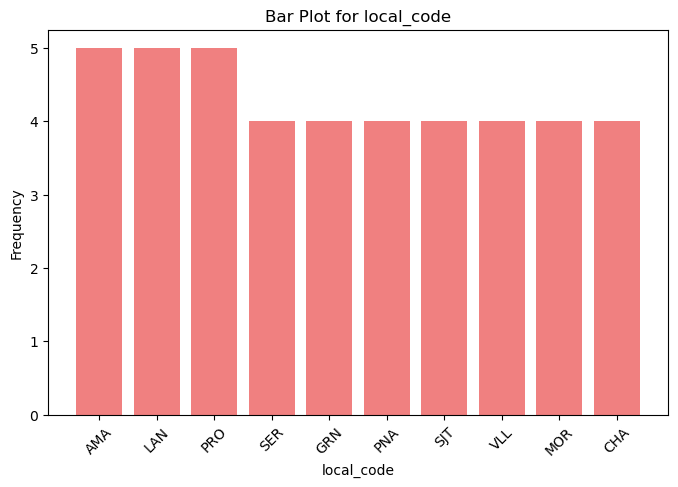

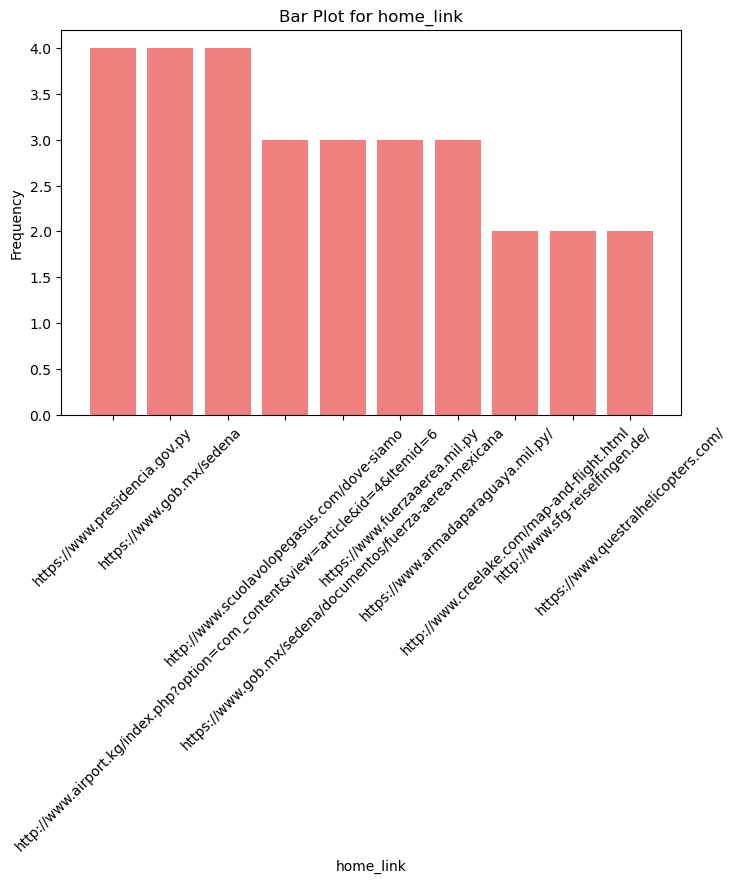

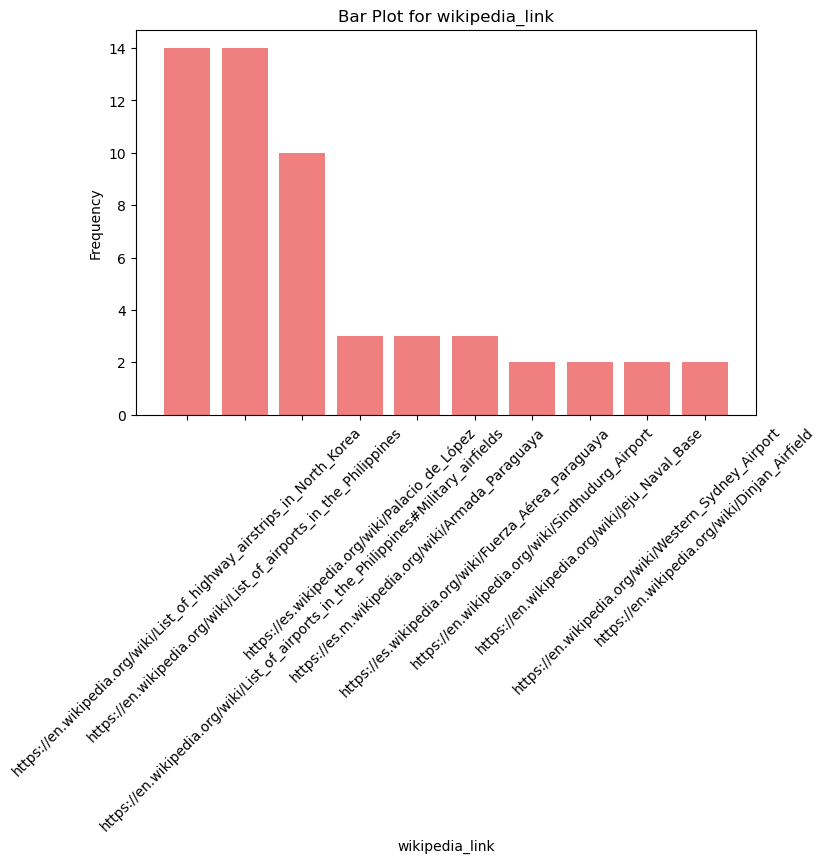

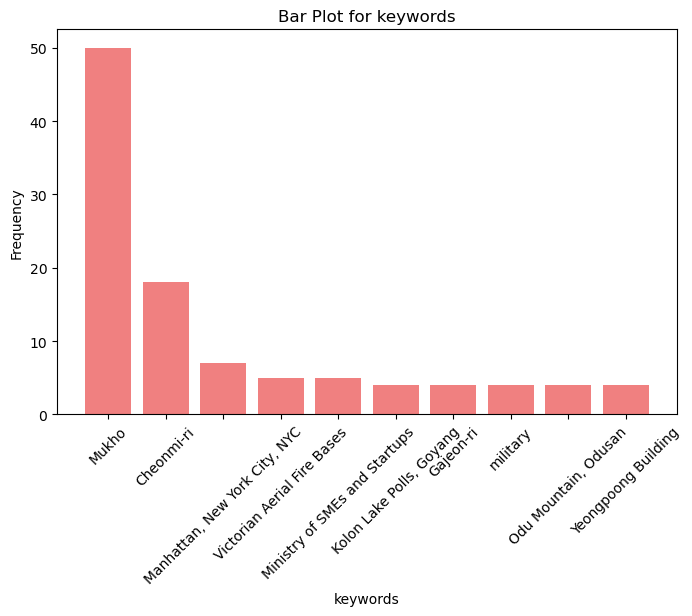

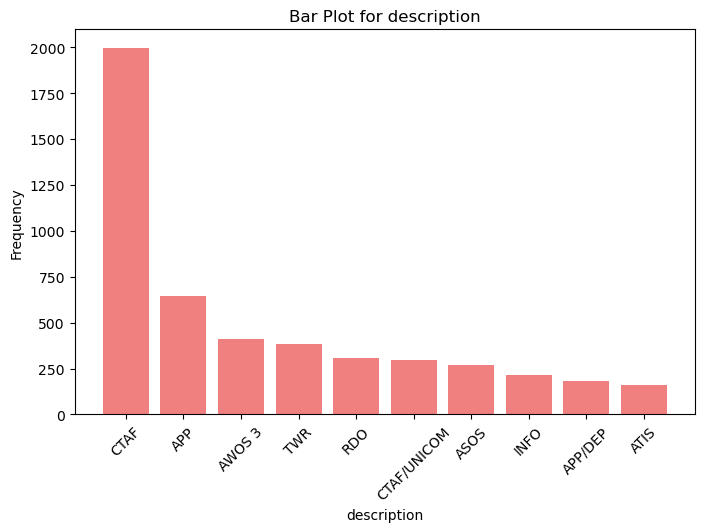

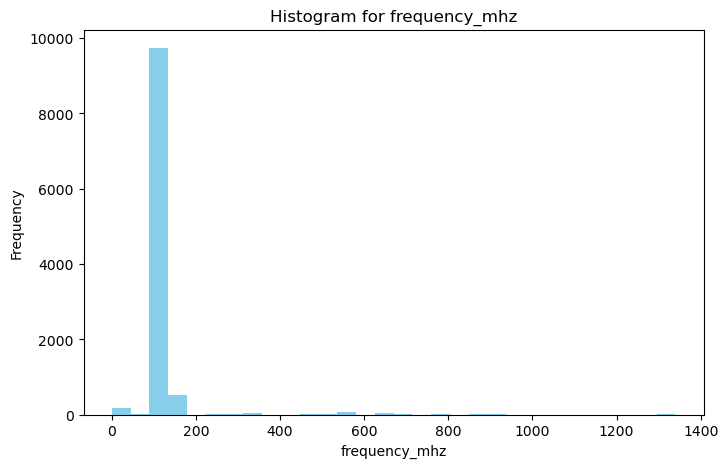

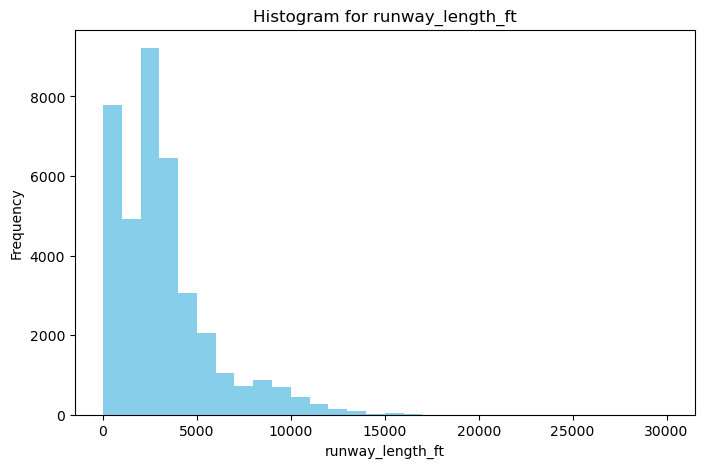

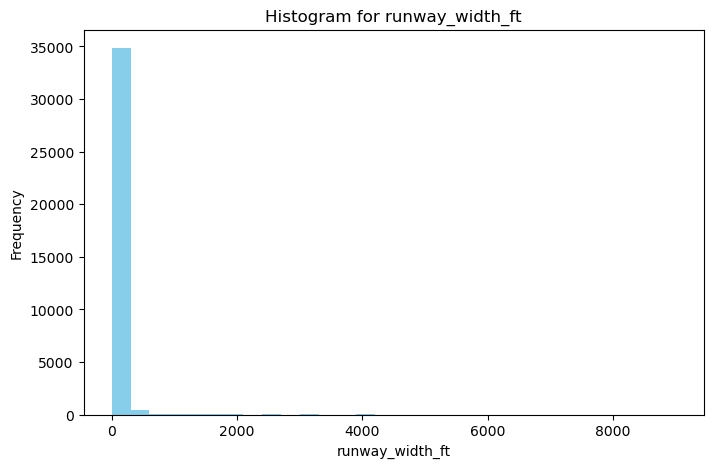

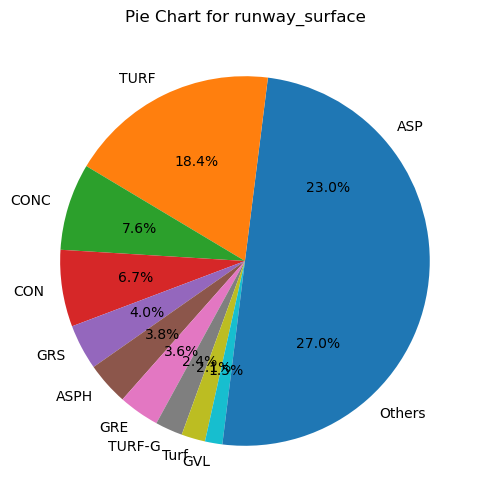

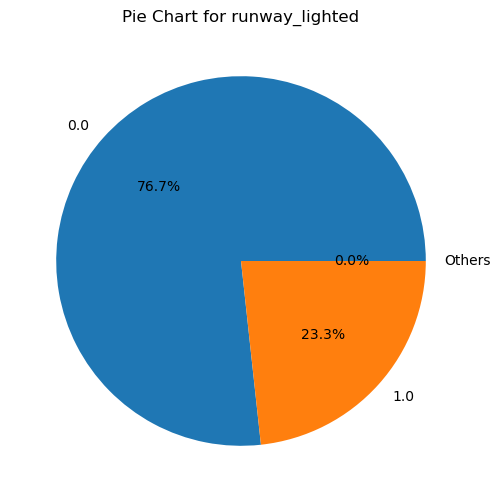

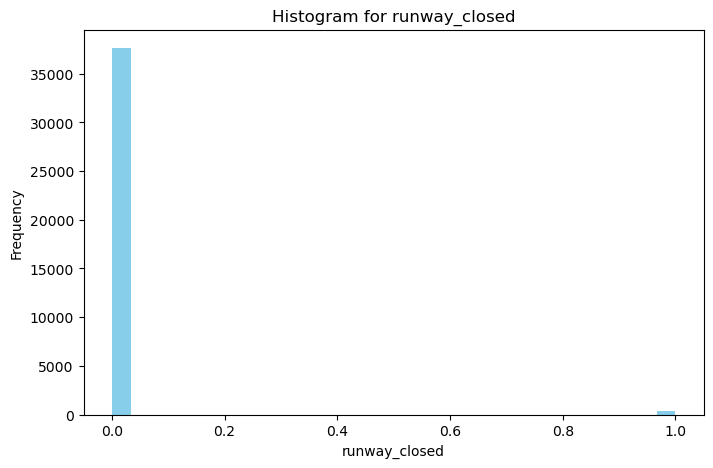

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


columns = ['X', 'Y', 'OBJECTID', 'id', 'airport_ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
           'elevation_ft', 'continent', 'iso_country', 'iso_region', 'municipality', 'scheduled_service',
           'gps_code', 'iata_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords', 'description',
           'frequency_mhz', 'runway_length_ft', 'runway_width_ft', 'runway_surface', 'runway_lighted', 'runway_closed']

# Plot data for each column
for col in columns:
    if col in ['type', 'scheduled_service', 'runway_surface', 'runway_lighted']:
        # Plot pie charts for categorical columns
        value_counts = df[col].value_counts()
        top_categories = value_counts.nlargest(10)  # Select top 10 categories
        rest_categories = value_counts[~value_counts.index.isin(top_categories.index)].sum()
        top_categories["Others"] = rest_categories
        plt.figure(figsize=(6, 6))
        plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%')
        plt.title(f'Pie Chart for {col}')
        plt.show()
    elif df[col].dtype == 'float64':
        # Plot histogram for numeric columns
        plt.figure(figsize=(8, 5))
        plt.hist(df[col], bins=30, color='skyblue')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Histogram for {col}')
        plt.show()
    else:
        # For non-numeric and non-categorical columns, plot bar plot for the value counts
        value_counts = df[col].value_counts()
        top_categories = value_counts.nlargest(10)  # Select top 10 categories
        plt.figure(figsize=(8, 5))
        plt.bar(top_categories.index, top_categories.values, color='lightcoral')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Bar Plot for {col}')
        plt.xticks(rotation=45)
        plt.show()


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Step 1: Load data from the CSV file
file_path = '/kaggle/input/world-airports/World_Airports.csv'
df = pd.read_csv(file_path)

# Step 2: Prepare the data
X = df[['elevation_ft', 'latitude_deg', 'longitude_deg', 'runway_width_ft']]  # Features
y = df['runway_length_ft']  # Target variable

# Step 3: Drop rows with missing values in both X and y
missing_rows = df.isnull().any(axis=1)
X = X[~missing_rows]
y = y[~missing_rows]

# Step 4: Handle missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 6: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions using the model
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3194651.855144875
R-squared: 0.4423754774336449


In [35]:
# Print the DataFrame and its columns
print(df.head())
print(df.columns)


              X             Y  OBJECTID    id airport_ident           type  \
0 -1.301162e+07  4.212194e+06         1  6528          00CA  small_airport   
1 -9.034601e+06  3.347916e+06         2  6589          01FL  small_airport   
2 -1.309952e+07  4.104774e+06         3  6756          04CA  small_airport   
3 -1.011189e+07  3.887414e+06         4  6779          04MS  small_airport   
4 -1.287577e+07  4.267031e+06         5  6784          04NV  small_airport   

                                name  latitude_deg  longitude_deg  \
0            Goldstone (GTS) Airport     35.354740    -116.885329   
1   Cedar Knoll Flying Ranch Airport     28.781900     -81.159203   
2                   Gray Butte Field     34.563900    -117.675003   
3  Nick's Flying Service Inc Airport     32.940537     -90.836683   
4             Kingston Ranch Airport     35.755501    -115.665001   

   elevation_ft  ... home_link wikipedia_link keywords description  \
0        3038.0  ...       NaN            NaN 

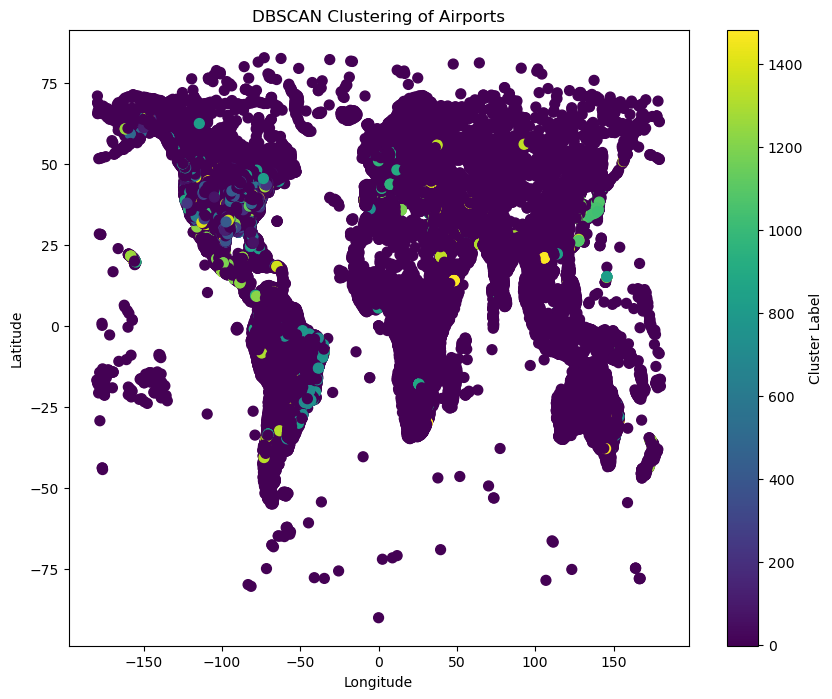

Number of clusters: 1484
Number of outliers: 52042


In [36]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Extract latitude and longitude columns for clustering
X = df[['latitude_deg', 'longitude_deg']].values

# Initialize DBSCAN with appropriate hyperparameters
eps = 0.1  # You may need to adjust this value based on your data
min_samples = 5  # You may need to adjust this value based on your data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model to the data
labels = dbscan.fit_predict(X)

# Add cluster labels to the original dataset
df['cluster_label'] = labels

# Visualize the clusters and outliers on a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude_deg'], df['latitude_deg'], c=df['cluster_label'], cmap='viridis', s=50)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Airports')
plt.colorbar(label='Cluster Label')
plt.show()

# Display the number of clusters (excluding outliers)
num_clusters = len(np.unique(labels)) - 1  # Subtract 1 for the outlier label (-1)
num_outliers = np.sum(labels == -1)
print(f"Number of clusters: {num_clusters}")
print(f"Number of outliers: {num_outliers}")
